In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seabornb assns






ModuleNotFoundError: No module named 'seabornb'

In [24]:
dataset=r"A:\spaks\New folder\Iris.csv"
iris_df=pd.read_csv(dataset)
iris_df


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [20]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

C:\Users\user1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


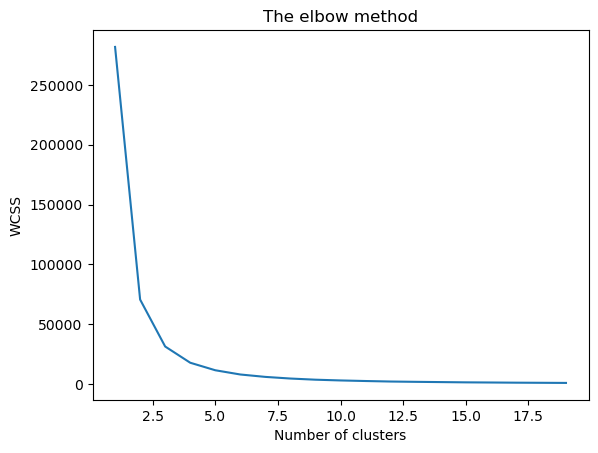

In [26]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [29]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

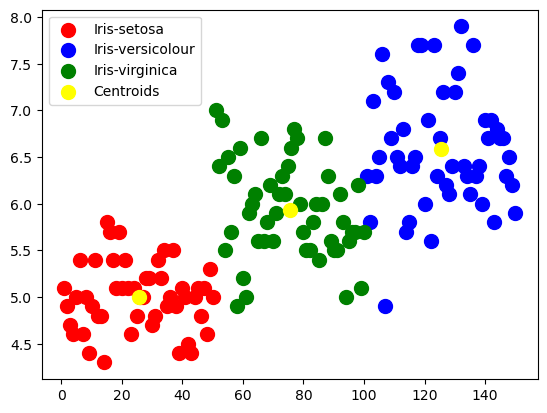

In [30]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

C:\Users\user1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


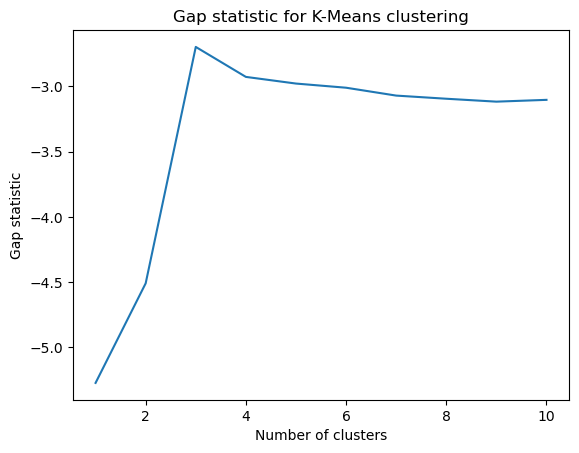

The optimal number of clusters is: 3


In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def gap_statistic(X):
    # Set the range of K values to consider
    ks = range(1, 11)

    # Compute the within-cluster dispersion for each value of K
    Wks = np.zeros(len(ks))
    for i, k in enumerate(ks):
        km = KMeans(n_clusters=k)
        km.fit(X)
        Wks[i] = km.inertia_

    # Generate the reference dataset using a uniform distribution
    X_ref = np.random.rand(*X.shape)

    # Compute the within-cluster dispersion for each value of K on the reference dataset
    Wkbs = np.zeros(len(ks))
    for i, k in enumerate(ks):
        km = KMeans(n_clusters=k)
        km.fit(X_ref)
        Wkbs[i] = km.inertia_

    # Compute the Gap statistic
    sk = np.sqrt(1 + 1 / len(X_ref)) * np.std(np.log(Wkbs))
    Gap_k = np.log(Wkbs) - np.log(Wks) + sk

    # Find the optimal number of clusters
    best_k = np.argmax(Gap_k) + 1

    return Gap_k, best_k

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=3, random_state=42)

# Compute the Gap statistic for the data
Gap_k, best_k = gap_statistic(X)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Gap_k)
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.title('Gap statistic for K-Means clustering')
plt.show()

print('The optimal number of clusters is:', best_k)

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

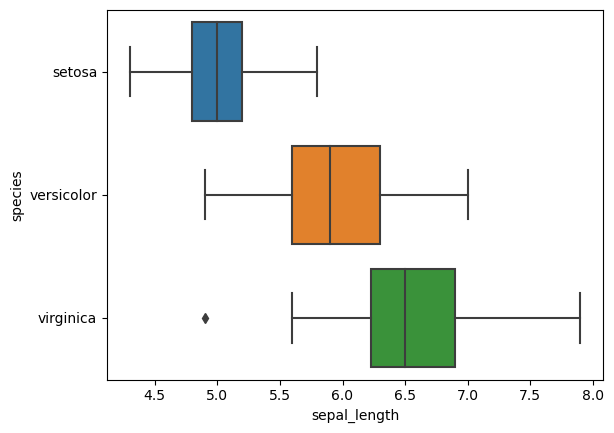

In [8]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
sns.boxplot(x="sepal_length", y="species", data=iris_df)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

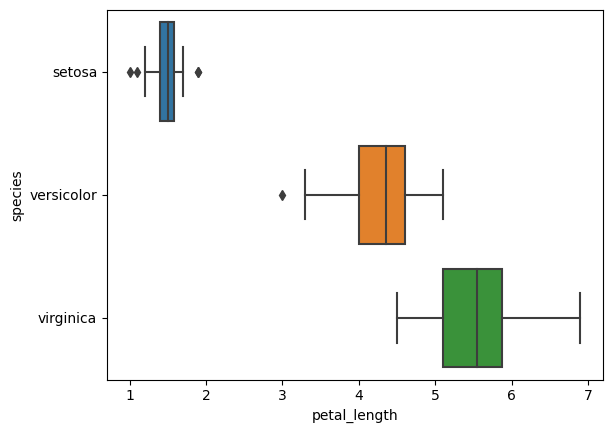

In [11]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
sns.boxplot(x="petal_length", y="species", data=iris_df)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

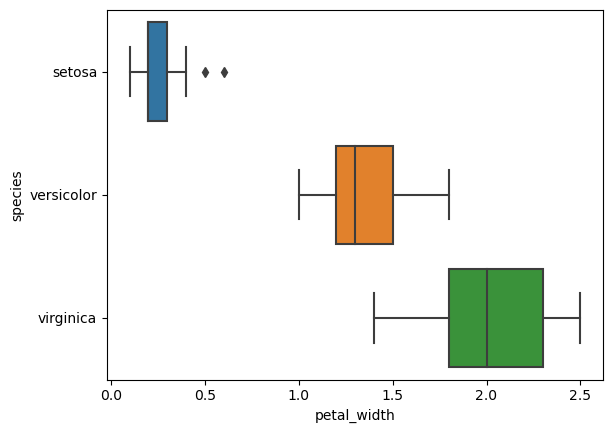

In [14]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
sns.boxplot(x="petal_width", y="species", data=iris_df)